matplotlib折れ線グラフのX軸に離散値のラベルを設定して、全て表示したい

display_discrete_x_labels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.notebook_repr_html = False  # jupyter notebook上での出力形式を制御するために書いています。無くても動きます。

Duplicate key in file PosixPath('/usr/local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : Hiragino sans')


In [2]:
# 動作環境の確認
print(pd.__version__)
print(np.__version__)

1.1.2
1.19.1


## 今日描きたいグラフはこれです

## 普通に

In [3]:
df = pd.DataFrame({
    'col_A': [1.2 ,3.4, 5.6],
    'col_B': [9.8, 7.6, 5.4],
    'col_C': [11.1, 22.2, 33.3],
    'col_D': [99.9, 88.8, 77.7]
})
df

   col_A  col_B  col_C  col_D
0    1.2    9.8   11.1   99.9
1    3.4    7.6   22.2   88.8
2    5.6    5.4   33.3   77.7

<AxesSubplot:>

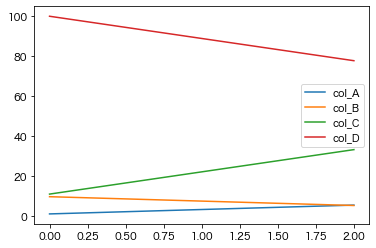

In [4]:
df.plot()

In [5]:
time_series = []
for i in range(1, 6):
    temp = [f"{i}月前半", f"{i}月後半"]
    time_series.extend(temp)

# これリスト内包表記で上手く書けないのかな?

In [6]:
df = pd.DataFrame({
    'phase': time_series, 
    'foo': [i **2 -6 * i  - 10 for i in range(10)],
    'bar': [-(i **2) + 8 * i  + 2  for i in range(10)],
})
df

  phase  foo  bar
0  1月前半  -10    2
1  1月後半  -15    9
2  2月前半  -18   14
3  2月後半  -19   17
4  3月前半  -18   18
5  3月後半  -15   17
6  4月前半  -10   14
7  4月後半   -3    9
8  5月前半    6    2
9  5月後半   17   -7

<AxesSubplot:>

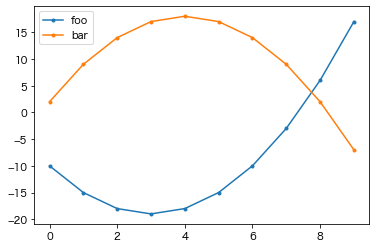

In [7]:
df.plot(style=".-")

<AxesSubplot:xlabel='phase'>

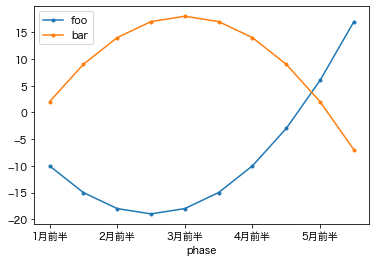

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))

df.plot(x='phase', ax=ax, style=".-")

* 現状、x軸の目盛り（短い縦線）が毎月前半しか無い → 後半も表示したい
* 現状、x軸のラベルが毎月前半しか表示されない → 後半も表示したい

これがやりたいことである。

figsize=(6, 4) だから（全部表示するスペースがないから）こうなっているわけでは無いみたい。  
figsize=(15, 4) と横長にしても、目盛りとラベルは1つおきに表示された。

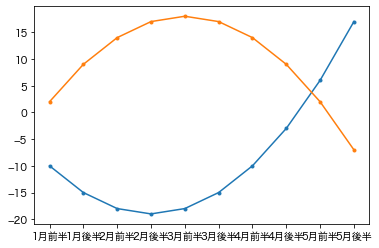

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(df["phase"], df["foo"], ".-")
ax.plot(df["phase"], df["bar"], ".-")

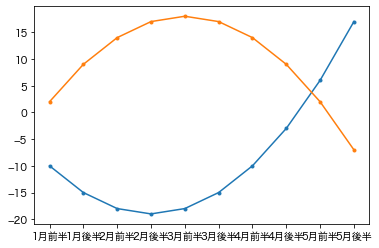

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(df["phase"], df[["foo", "bar"]], ".-")

<AxesSubplot:xlabel='phase'>

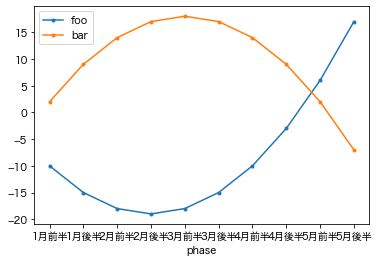

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))

df.plot(x='phase', ax=ax, style=".-", xticks=range(len(df)))

<AxesSubplot:xlabel='phase'>

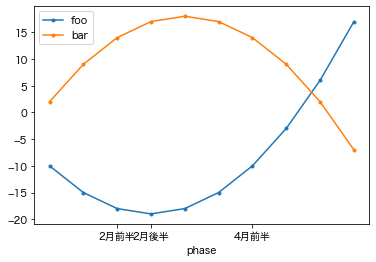

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))

df.plot(x='phase', ax=ax, style=".-", xticks=[2, 3, 6])

In [13]:
time_series = []
for i in range(1, 13):
    temp = [f"{i}月前半", f"{i}月後半"]
    time_series.extend(temp)

# これリスト内包表記で上手く書けないのかな?

In [14]:
df_long = pd.DataFrame({
    'phase': time_series, 
    'foo': [i **2 -6 * i  - 10 for i in range(24)],
    'bar': [-(i **2) + 8 * i  + 2  for i in range(24)],
})
df_long

    phase  foo  bar
0    1月前半  -10    2
1    1月後半  -15    9
2    2月前半  -18   14
3    2月後半  -19   17
4    3月前半  -18   18
5    3月後半  -15   17
6    4月前半  -10   14
7    4月後半   -3    9
8    5月前半    6    2
9    5月後半   17   -7
10   6月前半   30  -18
11   6月後半   45  -31
12   7月前半   62  -46
13   7月後半   81  -63
14   8月前半  102  -82
15   8月後半  125 -103
16   9月前半  150 -126
17   9月後半  177 -151
18  10月前半  206 -178
19  10月後半  237 -207
20  11月前半  270 -238
21  11月後半  305 -271
22  12月前半  342 -306
23  12月後半  381 -343

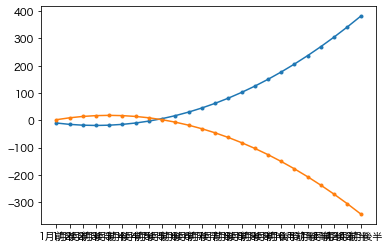

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(df_long["phase"], df_long[["foo", "bar"]], ".-")

* ax.plot でx軸が数値の場合、適当に間引かれる（tickとlabelの間隔は自動的に調整される）
* ax.plot でx軸が数値でない場合、間引かれることはなく、必ず全ての値がtickとlabelに表示される
* df.plot でx軸が数値でない場合、適当に間引かれる（tickとlabelの間隔は自動的に調整される）
  * この場合に表示されるものを手動で指定したい場合、xticks変数で指定する